# Simple Linear Model

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

## MNIST Data

Import MNIST Data

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts:
1. 55,000 data points of training data (`mnist.train`)
2. 10,000 data points of test data (`mnist.test`)
3. 5,000 data points of validation data (`mnist.validation`)

## One-Hot Encoding

In [3]:
mnist.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

Classify the vectors into labels

Note that `class` is a Python keyword so we will use `cls` instead.

In [4]:
# Use label.argmax()
# Print first 5 labels

## Visualize the dataset


In [5]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((28, 28)), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [5]:
# Get the first ten images from the test-set.
# images = 

# Get the true classes for those images.
# mnist.test.cls = 
# cls_true = mnist.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

NameError: name 'np' is not defined

## TensorFlow Graph

A TensorFlow graph consists of the following parts which will be detailed below:

* Placeholder variables used to change the input to the graph.
* Model variables that are going to be optimized so as to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, which is not covered in this tutorial.

### Data Dimensions

In [7]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

### Placeholder variables

In [8]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

Quick recap, `x` is a `placeholder`, a value that we will input when we ask TensorFlow to run a computation. We will represent the MNIST images as 2-D tensor of floating-point numbers, with a shape of `[None, 784]`, `None`, means that a dimension can be of any length.

### Variables to be optimized

We also need the weights and biases. 

In [9]:
weights = tf.Variable(tf.zeros([..., ...]))
biases = tf.Variable(tf.zeros([...]))

`weights` has a shape of `[784,10]` as we want to multiply the 784-dimensional image vectors by `weights` to produce 10-dimensional vectors of evidence for the difference classes. `biases` has a shape of `[10]` as we can add it to the output.

### Model

The simple mathematical model multiples the images in the placeholder variable `x` with `weight` and `biases`. The result is a matrix of shape `[num_images, 10]` and `W` has shape `[784, 10]`.

`logits` is typical TensorFlow terminology.

In [10]:
logits = tf.matmul(x, weights) + biases

Now `logits` is a matrix of shape `[num_images, num_class]`. Where the ith row and jth column is an estimate of how likely the ith input image is to be in the jth class.

Since the values maybe be very small or very large, we want to normalize them so that each row of the `logits` matrix sums to 1 and each element is between 0 and 1. This is calculated using the softamx function and we store the result in `y_pred`

In [11]:
y_pred = tf.nn.softmax(...)

The predicted class can be calculated from the `y_pred` matrix by taking the index of the largest element of each row.

In [12]:
y_pred_cls = tf.argmax(y_pred, axis = 1)

### Cost-function to be optimized

We will try to minimize the error, which represents how far off our model is from the our desired outcome. 

The cross-entropy is a performance measure used in classification. It is a continuous function that is always positive and if the predicted output of the model is exactly matches the desired output then the cross-entropy equals zero.

The goal of optimization os therefore to minimize the cross-entropy by changing the `W` and `b`.

TensorFlow has a built-in function for calculating the cross-entropy. Note that it uses the values of the `logits` because it also calculates the softmax internally.

In [13]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

Cross-entropy gives us a meaure of how well the model performs on each image individually. But `Optimizer` takes in a single scalar value, so we simply take the average of the cross-entropy for all the image-classifications. 

In [14]:
cost = tf.reduce_mean(...)

### Optimization Method

Use Gradient Descent where step-size is 0.5 to minimize the cost measure. 

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(...)

### Performance Meaures

We need a few more performance measures to display the progress to the user.

This is a vector of booleans whether the predicted class equals the true class of each image.

In [16]:
correct_prediction = tf.equal(..., ...)

We can then calculate the accuracy by first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1 and then calculating the average of these numbers.

In [17]:
accuracy = tf.reduce_mean(tf.cast(..., tf.float32))

## TensorFlow Run

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph. 

The variables `weights` and `biases` must be initialized before we start optimizing them.

In [18]:
session = tf.Session()
session.run(tf.global_variables_initializer())

### Helper function to perform optimization iterations

In [24]:
batch_size = 100

Using small batches of random data is called stochastic training -- in this case, stochastic gradient descent. We would like to use train on the entire data set but that that's expensive.

`optimize` is a helper function that perform user-specified number of iterations so as to gradually improve performance.

In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [27]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
       
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        

### Helper-functions to show performance

Some helper functions:

In [39]:
feed_dict_test = {x: mnist.test.images,
                  y_true: mnist.test.labels,
                  y_true_cls: mnist.test.cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
    
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = mnist.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = mnist.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = mnist.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

### Helper function to plot model weights

In [41]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

## Performance before any optimization

In [21]:
print_accuracy()

Accuracy on test-set: 9.8%


### Performance after 1 iteration

In [29]:
optimize(num_iterations = 1)
print_accuracy()

Accuracy on test-set: 31.7%


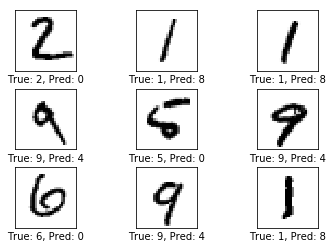

In [34]:
plot_example_errors()

### Performance after 10 iterations

In [36]:
optimize(num_iterations = 9)
print_accuracy()

Accuracy on test-set: 47.6%


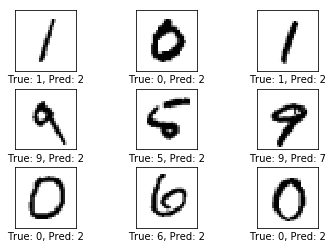

In [37]:
plot_example_errors()

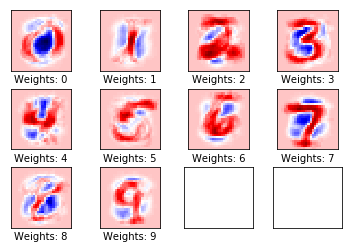

In [42]:
plot_weights()

### Performance after 1000 iterations

In [43]:
optimize(num_iterations = 990)
print_accuracy()

Accuracy on test-set: 92.0%


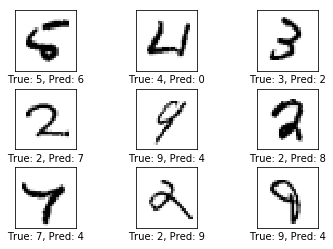

In [44]:
plot_example_errors()

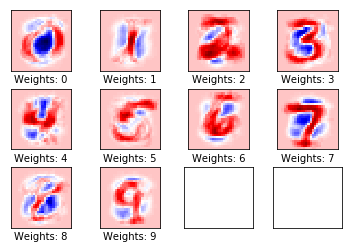

In [42]:
plot_weights()

We can plot the confusion matrix to see more details about mis-classifications

[[ 967    0    0    1    0    1    7    1    3    0]
 [   0 1107    2    2    0    1    4    2   17    0]
 [  13   10  885   21   15    2   13   14   51    8]
 [   3    1    9  925    1   21    3    9   29    9]
 [   2    1    1    1  916    0   11    2   13   35]
 [  13    3    0   36   10  742   15    8   57    8]
 [  14    3    3    2   13   12  902    1    8    0]
 [   3    9   19   10    7    1    0  937    4   38]
 [   6    5    3   17    9   10    9   10  900    5]
 [  11    5    1    8   34    3    0   17   11  919]]


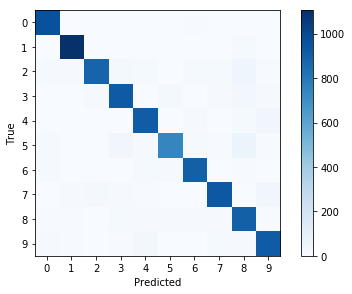

In [45]:
print_confusion_matrix()

92% is not too bad but we can definitely do better. Stay tuned!

### References
- https://www.tensorflow.org/get_started/mnist/beginners
- https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow